## Exploratory Data Analysis: Movies 


Features:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

## Top 10 best and worst movies based on 
- Revenue
- Budget 
- Profit (Rev - Budget)
- ROI (Rev / Budget) only for movies with budget >=10 
- Number of votes 
- Rating (min 10)
- Popularity 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
pd.read_csv("movies_complete.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [3]:
#import data - preset data type for release_date

df = pd.read_csv("movies_complete.csv", parse_dates=['release_date'])
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [4]:
df[['release_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  44657 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 349.3 KB


In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df.describe(include='all', datetime_is_numeric=True)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
count,44691.00,44691,20284,44657,42586,4463,44681,8854.00,7385.00,33356,...,42077.00,44691.00,43179.00,43740,41094,44467,42502,44691.00,44691.00,43960
unique,nan,41605,20171,NaN,4044,1691,89,nan,nan,22537,...,nan,nan,nan,43715,1828,44456,42166,nan,nan,17349
top,nan,Cinderella,Based on a true story.,NaN,Drama,The Bowery Boys,en,nan,nan,Metro-Goldwyn-Mayer (MGM),...,nan,nan,nan,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,nan,nan,John Ford
freq,nan,11,7,NaN,4935,29,31755,nan,nan,741,...,nan,nan,nan,3,22189,3,24,nan,nan,66
mean,107186.24,NaN,NaN,1992-04-28 16:30:02.539360640,NaN,NaN,NaN,21.67,68.97,NaN,...,6.00,2.96,97.57,NaN,NaN,NaN,NaN,12.48,10.31,NaN
min,2.00,NaN,NaN,1874-12-09 00:00:00,NaN,NaN,NaN,0.00,0.00,NaN,...,0.00,0.00,1.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN
25%,26033.50,NaN,NaN,1978-08-12 00:00:00,NaN,NaN,NaN,2.00,2.41,NaN,...,5.30,0.40,86.00,NaN,NaN,NaN,NaN,6.00,2.00,NaN
50%,59110.00,NaN,NaN,2001-08-16 00:00:00,NaN,NaN,NaN,8.20,16.87,NaN,...,6.10,1.15,95.00,NaN,NaN,NaN,NaN,10.00,6.00,NaN
75%,154251.00,NaN,NaN,2010-12-10 00:00:00,NaN,NaN,NaN,25.00,67.64,NaN,...,6.80,3.77,107.00,NaN,NaN,NaN,NaN,15.00,12.00,NaN
max,469172.00,NaN,NaN,2017-12-27 00:00:00,NaN,NaN,NaN,380.00,2787.97,NaN,...,10.00,547.49,1256.00,NaN,NaN,NaN,NaN,313.00,435.00,NaN


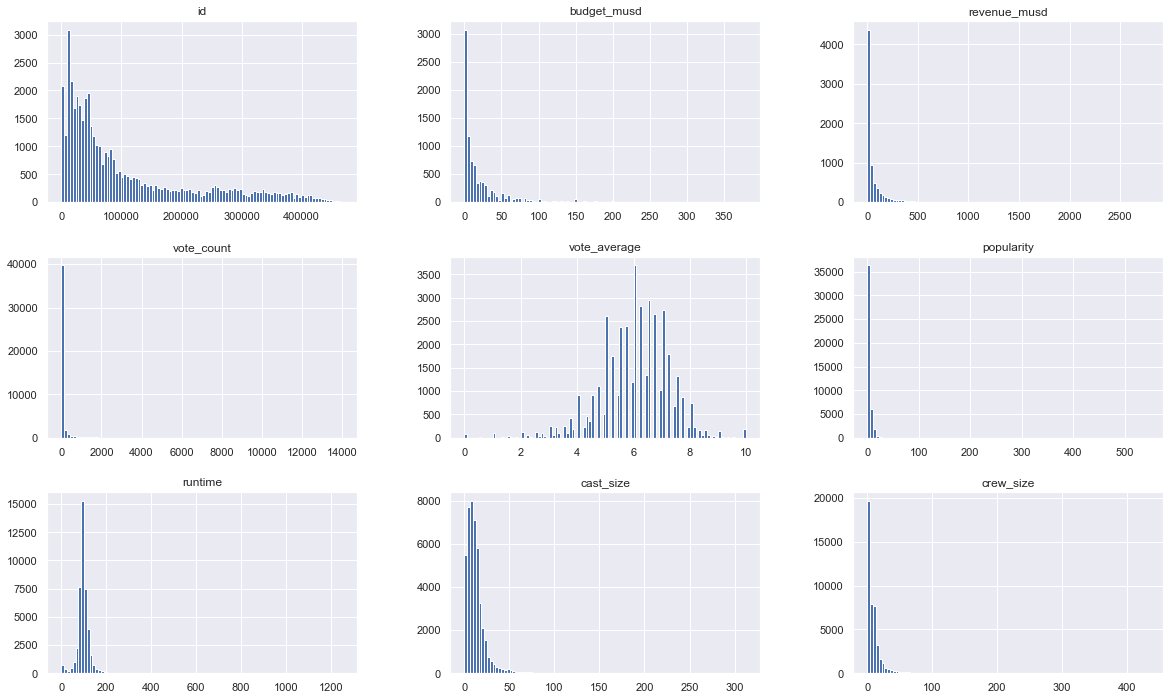

In [7]:
df.hist(figsize=(20,12), bins=100)
plt.show()

In [8]:
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [9]:
#Cinderella - true duplicate or not

df.loc[df['title']=='Cinderella'].sort_values(by='release_date')

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,nan,nan,Star-Film|Georges Méliès,...,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,nan,nan,NaN,...,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,nan,nan,Lenfilm,...,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,...,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,nan,nan,NaN,...,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,nan,nan,Walt Disney Television|Citadel Entertainment|S...,...,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,nan,nan,NaN,...,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,nan,nan,GoodTimes Entertainment,...,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,nan,nan,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,...,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
44633,98604,Cinderella,NaN,2012-02-14,Comedy|Romance,NaN,ru,nan,nan,Channel One Russia|Central Partnership,...,4.60,0.80,91.00,"Masha Krapivina - is yet beautiful, and not th...",Pусский,<img src='http://image.tmdb.org/t/p/w185//nvGe...,Kristina Asmus|Nikita Efremov|Artyom Tkachenko...,18,4,Sergey Ivanov


In [10]:
from IPython.display import HTML

In [11]:
#features: Revenue, Budget, Number of Votes, Rating and Popularity
#Profit and ROI to be calculated after adding the features

df.columns.to_list()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [12]:
#incorporate HTML to capture movie posters
df_best = df[['poster_path','title', 'revenue_musd', 'budget_musd', 'vote_count', 'vote_average', 'popularity']].copy()
df_best.head()

,poster_path,title,revenue_musd,budget_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,373.55,30.00,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,262.80,65.00,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,81.45,16.00,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,76.58,nan,173.00,5.70,8.39


In [13]:
df_best['profit'] = df['revenue_musd'] - df['budget_musd']
df_best['roi'] = df['revenue_musd'] / df['budget_musd']

df_best.head()

,poster_path,title,revenue_musd,budget_musd,vote_count,vote_average,popularity,profit,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,373.55,30.00,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,262.80,65.00,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,81.45,16.00,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,76.58,nan,173.00,5.70,8.39,nan,nan


In [14]:
#rename columns

df_best.columns = ["", "Title", "Revenue", "Budget", "Votes", "Average_Rating", "Popularity", "Profit", "ROI"]

In [15]:
df_best.set_index('Title', inplace=True)

In [16]:
df_best.head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,373.55,30.00,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,262.80,65.00,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,nan,nan,92.00,6.50,11.71,nan,nan
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,81.45,16.00,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,76.58,nan,173.00,5.70,8.39,nan,nan


In [17]:
df_best.sort_values(by="Average_Rating", ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,nan,nan,1.00,10.00,0.04,nan,nan
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,nan,nan,1.00,10.00,0.32,nan,nan
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,nan,nan,1.00,10.00,0.04,nan,nan
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,nan,nan,1.00,10.00,1.78,nan,nan
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,nan,nan,2.00,10.00,0.48,nan,nan


In [18]:
#not meaningful since only vote count was 1 or 2
#need to set a parameter
#same goes for ROI

df_best.sort_values(by='ROI', ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,12.40,0.00,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,8.50,0.00,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,33.58,0.00,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,2.76,0.00,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,115.10,0.00,457.00,5.90,9.23,115.10,1018619.28


In [19]:
#ROI seems very large - also due to nearly 0 budget
#set parameter for budget and vote count

#set budget min to 5

df_best.loc[df_best['Budget'] >= 5].sort_values(by='ROI', ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,792.97,10.50,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,368.74,5.00,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,775.40,11.00,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,470.65,7.00,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,328.20,5.00,512.00,6.30,7.79,323.20,65.64


In [20]:
#fill missing values for budget and votes by 0

df_best['Budget'].fillna(0, inplace=True)
df_best['Votes'].fillna(0, inplace=True)

In [21]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Revenue         7385 non-null   float64
 2   Budget          44691 non-null  float64
 3   Votes           44691 non-null  float64
 4   Average_Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [22]:
#best_worst function to return Title (index), Movie Poster (image) and selected feature (e.g. Revenue, Budget, etc.) 

def best_worst(n, by, ascending=False, min_bud = 0, min_vote=0):
    
    df2 = df_best.loc[(df_best['Budget'] >= min_bud) & (df_best['Votes'] >= min_vote), ["", by]].sort_values(by=by, ascending=ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

In [23]:
#input top number
#input attribute
#descending order default
#budget default 0
#vote default 0
best_worst(n=5, by='Revenue', ascending=False, min_bud=5, min_vote=20)

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


In [24]:
#if interested in worst, input True
best_worst(n=5, by='Votes')

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


In [25]:
#ROI with budget min of 5
best_worst(n=5, min_bud=5, by='ROI')

,,ROI
Title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


In [26]:
#highest rating 
best_worst(n=3, by='Average_Rating', min_vote=10)

,,Average_Rating
Title,,
As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty,,9.50
Planet Earth II,,9.50
The Civil War,,9.20


In [27]:
#most popular
best_worst(by='Popularity', n=5)

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Explore movies - search sci-fi + action with certain actor 

In [28]:
#actor = bruce willis
#genres = sci-fi + action

df.genres[:5]

0     Animation|Comedy|Family
1    Adventure|Fantasy|Family
2              Romance|Comedy
3        Comedy|Drama|Romance
4                      Comedy
Name: genres, dtype: object

In [29]:
#genres are divided by |
#boolean mask - Action and Science Fiction

mask_genres = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [30]:
mask_actor = df.cast.str.contains('Bruce Willis')
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [31]:
df.loc[mask_genres & mask_actor, ['poster_path', 'title', 'vote_average']].sort_values(by='vote_average', ascending=False)

,poster_path,title,vote_average
1448,<img src='http://image.tmdb.org/t/p/w185//fPtl...,The Fifth Element,7.30
19218,<img src='http://image.tmdb.org/t/p/w185//sNjL...,Looper,6.60
1786,<img src='http://image.tmdb.org/t/p/w185//fMtO...,Armageddon,6.50
14135,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,Surrogates,5.90
20333,<img src='http://image.tmdb.org/t/p/w185//3rWI...,G.I. Joe: Retaliation,5.40
27619,<img src='http://image.tmdb.org/t/p/w185//nPqN...,Vice,4.10


In [32]:
bruce =  df.loc[mask_genres & mask_actor, ['poster_path', 'title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

In [33]:
HTML(bruce.to_html(escape=False))

,poster_path,title,vote_average
1448,,The Fifth Element,7.30
19218,,Looper,6.60
1786,,Armageddon,6.50
14135,,Surrogates,5.90
20333,,G.I. Joe: Retaliation,5.40
27619,,Vice,4.10


## Explore movies - cast Uma Thurman & director Quentin Tarantino (low runtime)



In [34]:
mask_cast = df.cast.str.contains('Uma Thurman')
mask_director = df.director.str.contains('Quentin Tarantino')

In [35]:
df.loc[mask_cast & mask_director, ["poster_path", "title", "director", "runtime"]].sort_values(by='runtime', ascending=True).head(10)

,poster_path,title,director,runtime
6667,<img src='http://image.tmdb.org/t/p/w185//v7Ta...,Kill Bill: Vol. 1,Quentin Tarantino,111.00
7208,<img src='http://image.tmdb.org/t/p/w185//2yhg...,Kill Bill: Vol. 2,Quentin Tarantino,136.00
291,<img src='http://image.tmdb.org/t/p/w185//d5iI...,Pulp Fiction,Quentin Tarantino,154.00


In [36]:
uma_quentin = df.loc[mask_cast & mask_director, ["poster_path", "title", "director", "runtime"]].sort_values(by='runtime', ascending=True)


In [37]:
HTML(uma_quentin.to_html(escape=False))

,poster_path,title,director,runtime
6667,,Kill Bill: Vol. 1,Quentin Tarantino,111.00
7208,,Kill Bill: Vol. 2,Quentin Tarantino,136.00
291,,Pulp Fiction,Quentin Tarantino,154.00


## Explore most successful pixar studio movies between 2010 and 2015 (by revenue)

In [38]:
df.columns.to_list()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [39]:
df['release_date'][:5]

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [40]:
df_year = (df['release_date']>='2010-01-01') & (df['release_date']<='2015-12-31')
df_year[:5]

0    False
1    False
2    False
3    False
4    False
Name: release_date, dtype: bool

In [41]:
df['production_companies'][:5]

0                              Pixar Animation Studios
1    TriStar Pictures|Teitler Film|Interscope Commu...
2                          Warner Bros.|Lancaster Gate
3               Twentieth Century Fox Film Corporation
4            Sandollar Productions|Touchstone Pictures
Name: production_companies, dtype: object

In [42]:
df_pixar = df.production_companies.str.contains('Pixar')
df_pixar[:5]

0     True
1    False
2    False
3    False
4    False
Name: production_companies, dtype: object

In [43]:
df.loc[df_year & df_pixar, ["poster_path", "title", "revenue_musd", "release_date"]].sort_values(by='revenue_musd', ascending=False).head(5)

,poster_path,title,revenue_musd,release_date
15236,<img src='http://image.tmdb.org/t/p/w185//amY0...,Toy Story 3,1066.97,2010-06-16
29957,<img src='http://image.tmdb.org/t/p/w185//lRHE...,Inside Out,857.61,2015-06-09
20888,<img src='http://image.tmdb.org/t/p/w185//tyHH...,Monsters University,743.56,2013-06-20
17220,<img src='http://image.tmdb.org/t/p/w185//okIz...,Cars 2,559.85,2011-06-11
18900,<img src='http://image.tmdb.org/t/p/w185//8l0p...,Brave,538.98,2012-06-21


In [44]:
pixar = df.loc[df_year & df_pixar, ["poster_path", "title", "revenue_musd", "release_date"]].sort_values(by='revenue_musd', ascending=False)

In [45]:
HTML(pixar.head().to_html(escape=False))

,poster_path,title,revenue_musd,release_date
15236,,Toy Story 3,1066.97,2010-06-16
29957,,Inside Out,857.61,2015-06-09
20888,,Monsters University,743.56,2013-06-20
17220,,Cars 2,559.85,2011-06-11
18900,,Brave,538.98,2012-06-21


In [46]:
## Explore Movie - action or thriller genres, original language English, min rating 7.5 (sort by = most recent)

mask_genres1 = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
mask_genres1.head()

0    False
1    False
2    False
3    False
4    False
Name: genres, dtype: bool

In [47]:
df.original_language.value_counts()

en    31755
fr     2400
it     1471
ja     1339
de     1064
      ...  
la        1
jv        1
rw        1
eo        1
gl        1
Name: original_language, Length: 89, dtype: int64

In [48]:
mask_en = df.original_language == 'en'
mask_en.head()

0    True
1    True
2    True
3    True
4    True
Name: original_language, dtype: bool

In [49]:
mask_rating = df.vote_average >= 7.5
mask_rating.head()

0     True
1    False
2    False
3    False
4    False
Name: vote_average, dtype: bool

In [50]:
#set min vote count since certain movies have only 1
mask_count = df.vote_count >= 10

In [51]:
df.loc[mask_genres1 & mask_en & mask_rating &mask_count, ["title", "poster_path", "release_date", "original_language", "vote_average"]].sort_values(by='release_date', ascending=False).head()

,title,poster_path,release_date,original_language,vote_average
44490,Descendants 2,<img src='http://image.tmdb.org/t/p/w185//8BNy...,2017-07-21,en,7.50
43941,Dunkirk,<img src='http://image.tmdb.org/t/p/w185//ebSn...,2017-07-19,en,7.50
42624,The Book of Henry,<img src='http://image.tmdb.org/t/p/w185//suLF...,2017-06-16,en,7.60
26273,Guardians of the Galaxy Vol. 2,<img src='http://image.tmdb.org/t/p/w185//y4MB...,2017-04-19,en,7.60
41506,Logan,<img src='http://image.tmdb.org/t/p/w185//fnbj...,2017-02-28,en,7.60


In [52]:
movie_select = df.loc[mask_genres1 & mask_en & mask_rating &mask_count, ["title", "poster_path", "release_date", "original_language", "vote_average"]].sort_values(by='release_date', ascending=False)

In [53]:
HTML(movie_select.head(5).to_html(escape=False))

,title,poster_path,release_date,original_language,vote_average
44490,Descendants 2,,2017-07-21,en,7.50
43941,Dunkirk,,2017-07-19,en,7.50
42624,The Book of Henry,,2017-06-16,en,7.60
26273,Guardians of the Galaxy Vol. 2,,2017-04-19,en,7.60
41506,Logan,,2017-02-28,en,7.60


## Most common words found in movie taglines

In [54]:
from wordcloud import WordCloud

In [55]:
tagline = df['tagline'].dropna()
words = " ".join(tagline)

In [56]:
body = WordCloud(height=2000, width=4000, background_color='white', max_words=200, colormap='plasma').generate(words)

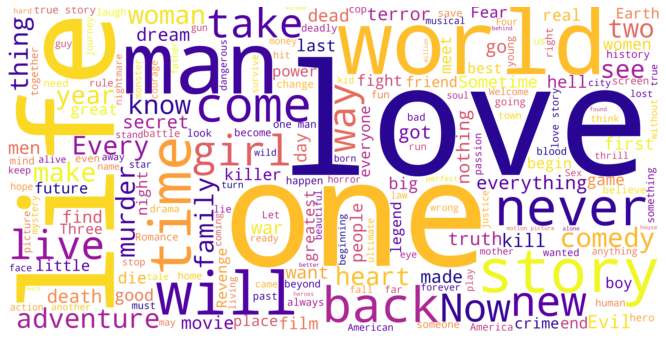

In [57]:
plt.figure(figsize=(18,6))
plt.imshow(body, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
#use image to change shape of the wordcloud 
from PIL import Image

In [59]:
mask = np.array(Image.open('blueheart.jpg'))

In [60]:
body = WordCloud(height=2000, width=4000, background_color='white', max_words=200, colormap='plasma', mask=mask).generate(words)

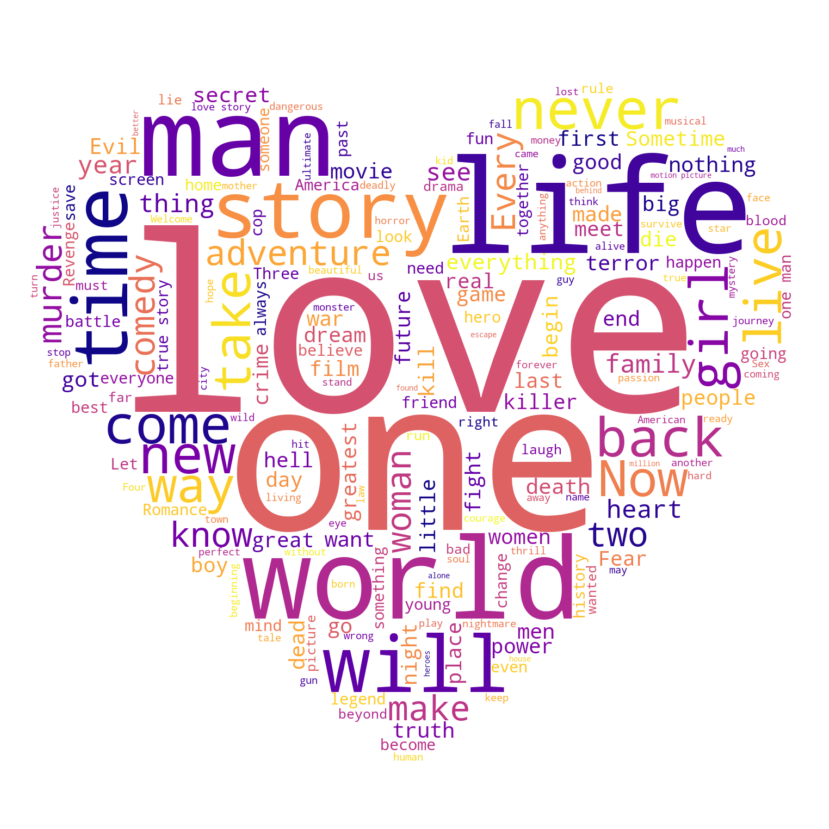

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(body, interpolation='bilinear')
plt.axis('off')
plt.show()

## Success: Franchise vs Non Franchise Movies 

In [62]:
df.columns.to_list()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [63]:
#franchise - belongs to collection feature 

df['belongs_to_collection'][:5]

0              Toy Story Collection
1                               NaN
2         Grumpy Old Men Collection
3                               NaN
4    Father of the Bride Collection
Name: belongs_to_collection, dtype: object

In [64]:
df['belongs_to_collection'].value_counts(dropna=False)

NaN                              40228
The Bowery Boys                     29
Totò Collection                     27
James Bond Collection               26
Zatôichi: The Blind Swordsman       26
                                 ...  
Pierino - Serie ufficiale            1
Tarzan (Mike Henry series)           1
Die Nibelungen Filmreihe             1
My Sisters Kids Collection           1
All Hallow's Eve Collection          1
Name: belongs_to_collection, Length: 1692, dtype: int64

In [65]:
#create a new feature - isna() False = collection, True = not collection

df['belongs_to_collection'].isna().sum()

40228

In [66]:
df['franchise'] = df['belongs_to_collection'].isna()

In [67]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,franchise
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,...,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,False
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,...,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,True
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,...,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,False
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,...,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,True
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,...,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,False


In [68]:
df.groupby('franchise').aggregate({'revenue_musd':'mean', 'budget_musd':'mean'})

,revenue_musd,budget_musd
franchise,,
False,165.71,38.32
True,44.74,18.05


In [69]:
df['roi'] = df['revenue_musd'] / df['budget_musd']

In [70]:
df.groupby('franchise')['roi'].mean()

franchise
False    856.40
True    6966.39
Name: roi, dtype: float64

In [71]:
df.groupby('franchise').aggregate({'roi':'median'})

,roi
franchise,
False,3.71
True,1.62


In [72]:
#franchise more successful - revenue / roi 
#less risk hence investors are willing to invest more on franchises

franchises = df.groupby('belongs_to_collection').agg({'title':'count', 'budget_musd':['sum','mean'], 'revenue_musd':['sum','mean'], 'vote_average':'mean', 'popularity':'mean', 'roi':'median', 'vote_count':'mean'})

In [73]:
franchises.nlargest(20, ('title', 'count'))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   nan         0.00   
Totò Collection                           27        0.00   nan         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   nan         0.00   
The Carry On Collection                   25        0.00   nan         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   nan         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   nan         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   nan         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   nan         0.00   
Sharpe Collection                         13        0.00   nan         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   nan         0.00   
Sherlock Holmes (1939 series)             12        0.00   nan         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    roi  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           nan         6.67       0.20    nan   
Totò Collection                           nan         6.84       1.05    nan   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             nan         6.40       1.10    nan   
The Carry On Collection                   nan         6.17       3.22    nan   
Charlie Chan (Sidney Toler) Collection    nan         6.61       0.63    nan   
Pokémon Collection                      66.87         6.06       4.37   4.46   
Godzilla (Showa) Collection               nan         5.98       3.42    nan   
Charlie Chan (Warner Oland) Collection    nan         6.66       0.66    nan   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            nan         5.53       0.17    nan   
Monster High Collection                   nan         6.49       3.59    nan   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           nan         7.47       1.30    nan   
Sharpe Collection                         nan         6.74       1.71    nan   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 nan         6.50       1.52    nan   
Sherlock Holmes (1939 series)             nan         6.92       2.88    nan   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               nan         5.25       1.94    nan   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [74]:
franchises.nlargest(20, ('revenue_musd','sum'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
James Bond Collection                  26     1539.65  59.22      7106.97   
The Fast and the Furious Collection     8     1009.00 126.12      5125.10   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
Transformers Collection                 5      965.00 193.00      4366.10   
Despicable Me Collection                6      299.00  74.75      3691.07   
The Twilight Collection                 5      385.00  77.00      3342.11   
Ice Age Collection                      5      429.00  85.80      3216.71   
Jurassic Park Collection                4      379.00  94.75      3031.48   
Shrek Collection                        5      535.00 133.75      2955.81   
The Hunger Games Collection             4      490.00 122.50      2944.16   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
X-Men Collection                        6      983.00 163.83      2808.83   
Avatar Collection                       1      237.00 237.00      2787.97   
Mission: Impossible Collection          5      650.00 130.00      2778.98   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   

                                            vote_average popularity    roi  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.37      23.41   8.24   
James Bond Collection                273.35         6.34      13.45   6.13   
The Fast and the Furious Collection  640.64         6.66      10.80   4.94   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
Transformers Collection              873.22         6.14      14.43   5.20   
Despicable Me Collection             922.77         6.78     106.72  12.76   
The Twilight Collection              668.42         5.84      29.50  10.27   
Ice Age Collection                   643.34         6.38      16.08   8.26   
Jurassic Park Collection             757.87         6.50      10.77   7.03   
Shrek Collection                     738.95         6.46      12.97   5.56   
The Hunger Games Collection          736.04         6.88      54.77   6.27   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
X-Men Collection                     468.14         6.82       9.71   3.02   
Avatar Collection                   2787.97         7.20     185.07  11.76   
Mission: Impossible Collection       555.80         6.60      16.51   4.55   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Harry Potter Collection                5983.25  
Star Wars Collection                   5430.38  
James Bond Collection                  1284.31  
The Fast and the Furious Collection    3197.00  
Pirates of the Caribbean Collection    5016.00  
Transformers Collection                3046.40  
Despicable Me Collection    

In [75]:
franchises.loc[franchises[('vote_count', 'mean')]>=1000].nlargest(20, ('vote_average','mean'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    roi  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.37      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        

## Most Successful Directors

In [76]:
df.director.head()

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
Name: director, dtype: object

In [77]:
df.director.value_counts().head(10)

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Woody Allen         49
Sidney Lumet        46
Jean-Luc Godard     46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64

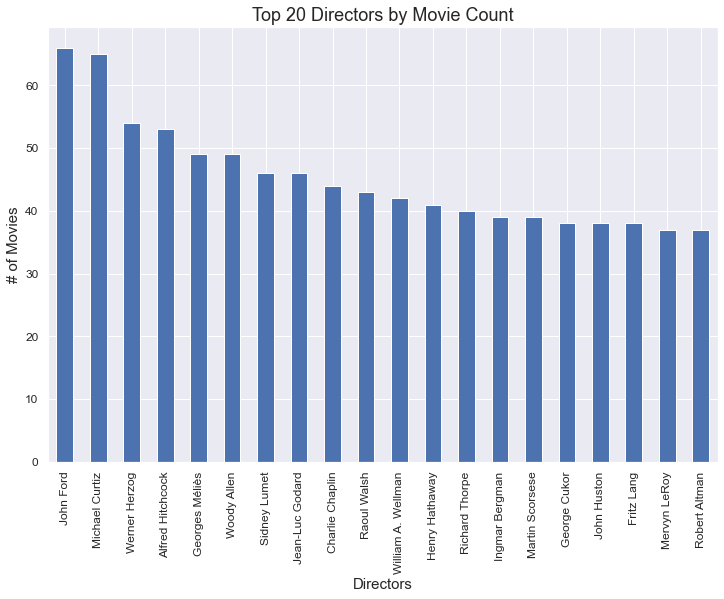

In [78]:
#plot bar graph - by # of movies directed

plt.figure(figsize=(12,8))
df.director.value_counts().head(20).plot(kind='bar', fontsize=12)
plt.title('Top 20 Directors by Movie Count', fontsize=18)
plt.ylabel('# of Movies', fontsize=15)
plt.xlabel('Directors', fontsize=15)
plt.show()

In [79]:
df.groupby('director').aggregate({'revenue_musd':'sum'}).nlargest(20, ('revenue_musd'))

,revenue_musd
director,
Steven Spielberg,9256.62
Peter Jackson,6528.24
Michael Bay,6437.47
James Cameron,5900.61
David Yates,5334.56
Christopher Nolan,4747.41
Robert Zemeckis,4138.23
Tim Burton,4032.92
Ridley Scott,3917.53


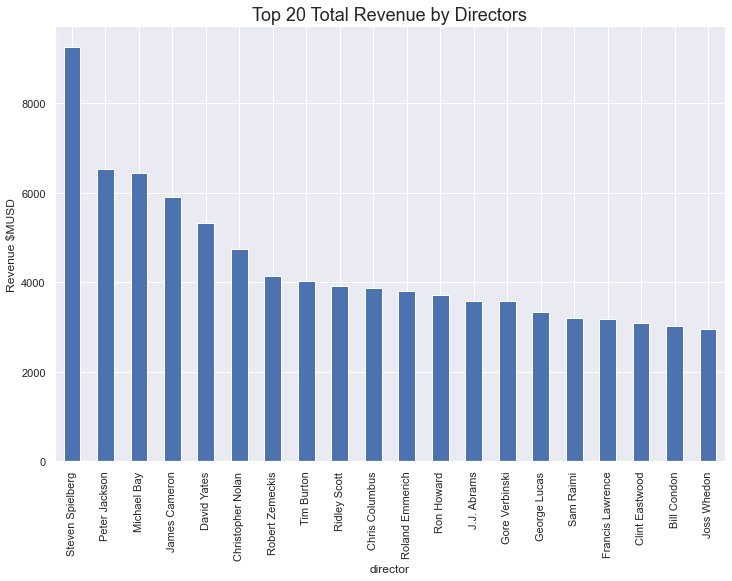

In [80]:
plt.figure(figsize=(12,8))
df.groupby('director')['revenue_musd'].sum().nlargest(20).plot(kind='bar')
plt.title('Top 20 Total Revenue by Directors', fontsize=18)
plt.ylabel('Revenue $MUSD')
plt.show()

In [81]:
directors = df.groupby('director').aggregate({'title':'count','vote_average':'mean','vote_count':'sum'})
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [82]:
#directors with highest average rating

directors.sort_values(by='vote_average', ascending=False)

,title,vote_average,vote_count
director,,,
Philip G. Flores,1,10.00,2.00
Holly L. De Ruyter,1,10.00,1.00
Mehul Kumar,1,10.00,1.00
Michael Lucas,1,10.00,1.00
Dick Bartlett,1,10.00,1.00
...,...,...,...
Yulin Kuang,1,nan,0.00
Yuliya Solntseva,1,nan,0.00
Zion Myers,1,nan,0.00


In [83]:
#filters - vote_count min 1000, titles min 10

directors.loc[(directors['title'] >=10) & (directors['vote_count']>=1000)].nlargest(20, 'vote_average')

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Krzysztof Kieślowski,10,7.51,1105.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Akira Kurosawa,30,7.28,3621.00
Spike Jonze,13,7.27,6665.00
Martin Scorsese,39,7.22,35541.00


In [84]:
#filter - genres horror 

df[['genres']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  42586 non-null  object
dtypes: object(1)
memory usage: 349.3+ KB


In [85]:
#includes null - change astype to string

df['genres'] = df['genres'].astype(str)
df[['genres']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  44691 non-null  object
dtypes: object(1)
memory usage: 349.3+ KB


In [86]:
#horror movies - top 20 directors 

df.loc[df['genres'].str.contains('Horror')].groupby('director').aggregate({'revenue_musd':'sum'}).nlargest(20, 'revenue_musd')

,revenue_musd
director,
Paul W.S. Anderson,982.29
James Wan,861.31
Wes Craven,834.93
Francis Lawrence,816.23
Ridley Scott,689.00
Marc Forster,531.87
Steven Spielberg,500.10
William Friedkin,466.40
Darren Lynn Bousman,456.34


## Most Successful Actors

In [87]:
df.cast[:5]

0    Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1    Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2    Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3    Whitney Houston|Angela Bassett|Loretta Devine|...
4    Steve Martin|Diane Keaton|Martin Short|Kimberl...
Name: cast, dtype: object

In [88]:
#separated by pipe

df.set_index('id', inplace=True)

In [89]:
df.head()

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,franchise,roi
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,...,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,False,12.45
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,...,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,True,4.04
15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,...,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,False,nan
31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,...,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,True,5.09
11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,...,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,False,nan


In [90]:
df.cast.str.split('|')

id
862       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
15602     [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
31357     [Whitney Houston, Angela Bassett, Loretta Devi...
11862     [Steve Martin, Diane Keaton, Martin Short, Kim...
                                ...                        
439050          [Leila Hatami, Kourosh Tahami, Elham Korda]
111109    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
67758     [Erika Eleniak, Adam Baldwin, Julie du Page, J...
227506    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
461257                                                  NaN
Name: cast, Length: 44691, dtype: object

In [91]:
act = df.cast.str.split('|', expand=True)
act

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,...,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,...,None,None,None,None,None,None,None,None,None,None


In [92]:
#per each id, actors are now listed by columns 
#transform so that column contains only 1 name

act.stack().reset_index(level=1, drop=True).to_frame()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [93]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [94]:
act.columns =['Actor']

In [95]:
act = act.merge(df[['title','revenue_musd', 'vote_average', 'popularity']], how='left', left_index=True, right_index=True)
act

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,nan,7.10,3.86
2,Susanna Haavisto,Ariel,nan,7.10,3.86
2,Matti Pellonpää,Ariel,nan,7.10,3.86
2,Eetu Hilkamo,Ariel,nan,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,nan,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,nan,nan,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,nan,nan,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,nan,nan,0.00


In [96]:
act.groupby('Actor').aggregate({'revenue_musd':'sum'}).nlargest(20, 'revenue_musd')

,revenue_musd
Actor,
Stan Lee,19414.96
Samuel L. Jackson,17109.62
Warwick Davis,13256.03
Frank Welker,13044.15
John Ratzenberger,12596.13
Jess Harnell,12234.61
Hugo Weaving,11027.58
Ian McKellen,11015.59
Johnny Depp,10653.76


In [97]:
act.Actor.nunique()

201501

In [98]:
act.Actor.unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [99]:
act.Actor.value_counts().head(20)

Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
John Carradine        109
Gérard Depardieu      109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: Actor, dtype: int64

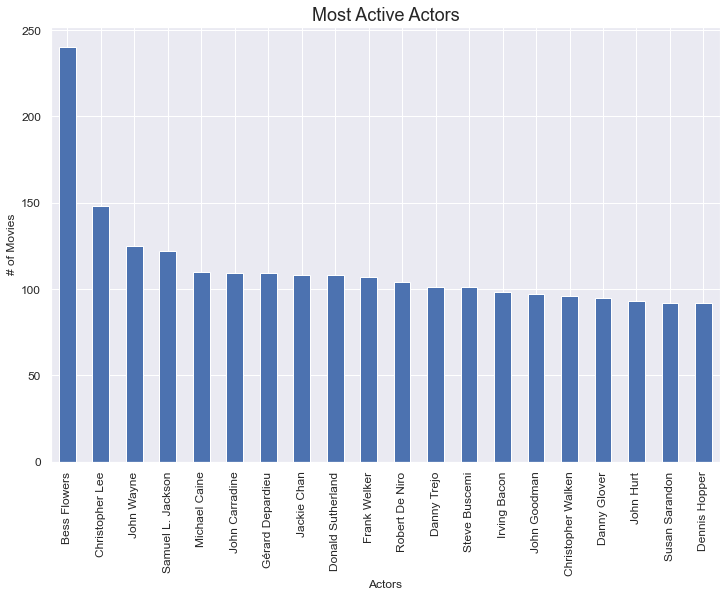

In [100]:
#most movie appearance
plt.figure(figsize=(12,8))
plt.title('Most Active Actors', fontsize=18)
plt.ylabel('# of Movies')
plt.xlabel('Actors')
act.Actor.value_counts().head(20).plot(kind='bar', fontsize=12)
plt.show()

In [101]:
#relabel the aggregate names
agg = act.groupby('Actor').agg(Total_Revenue =('revenue_musd','sum'),
                                  Mean_Revenue = ('revenue_musd', 'mean'),
                              Mean_Rating = ('vote_average', 'mean'),
                              Mean_Popularity = ('popularity', 'mean'),
                              Total_Movies = ('Actor','count'))

In [102]:
agg.nlargest(20, 'Total_Revenue')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Popularity,Total_Movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


In [103]:
agg.nlargest(20, 'Total_Movies')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Popularity,Total_Movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [104]:
agg[agg['Total_Movies']>=10].nlargest(10, 'Total_Revenue')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Popularity,Total_Movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


In [105]:
agg[(agg['Mean_Revenue']>= 100) & (agg['Total_Movies']>=10)].nlargest(10, 'Mean_Revenue')

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Popularity,Total_Movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10
